<a href="https://colab.research.google.com/github/Mineth03/Client-Predicting/blob/Preprocessing/Preprocessing/DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Format the csv file into correct format**

In [33]:
import pandas as pd

file_path = 'RawDataset.csv'
# Split columns
data = pd.read_csv(file_path, delimiter=';')

output_path = 'CleanedDataset.csv'
data.to_csv(output_path, index=False)

print(data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

# **Data analysis**

In [75]:
import pandas as pd

data = pd.read_csv('CleanedDataset.csv')

# Function to explain a column
def explain_column(column_name, data):
    col_data = data[column_name]
    col_dtype = col_data.dtype
    explanation = f"Column Name: {column_name}\n"
    explanation += f"Data Type: {col_dtype}\n"

    if col_dtype in ['int64', 'float64']:  # Numerical columns
        explanation += f"- Contains numerical data.\n"
        explanation += f"- Unique Values Count: {col_data.nunique()}\n"
    elif col_dtype in ['object', 'category']:  # Categorical columns
        explanation += f"- Contains categorical data.\n"
        explanation += f"- Unique Categories: {col_data.nunique()}\n"
        unique_categories = col_data.unique()
        explanation += f"- Categories: {', '.join(map(str, unique_categories))}"  # Show up to 10 categories
        if len(unique_categories) > 10:
            explanation += f", and {len(unique_categories) - 10} more...\n"
        else:
            explanation += "\n"
    else:
        explanation += f"- Contains data of an unhandled type.\n"
    # Handle missing values
    missing_count = col_data.isnull().sum()
    if missing_count > 0:
        explanation += f"- Missing Values: {missing_count} ({(missing_count / len(data) * 100):.2f}%)\n"
    else:
        explanation += "- No missing values.\n"
    explanation += "-" * 40
    return explanation

# Generate explanations for all columns
explanations = "\n".join([explain_column(col, data) for col in data.columns])

# Print explanations
print(explanations)

Column Name: age
Data Type: int64
- Contains numerical data.
- Unique Values Count: 78
- No missing values.
----------------------------------------
Column Name: job
Data Type: object
- Contains categorical data.
- Unique Categories: 12
- Categories: housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student, and 2 more...
- No missing values.
----------------------------------------
Column Name: marital
Data Type: object
- Contains categorical data.
- Unique Categories: 4
- Categories: married, single, divorced, unknown
- No missing values.
----------------------------------------
Column Name: education
Data Type: object
- Contains categorical data.
- Unique Categories: 8
- Categories: basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate
- No missing values.
----------------------------------------
Column Name: default
Data Type: object
- Contains categorical dat

## **Statictical Summery**

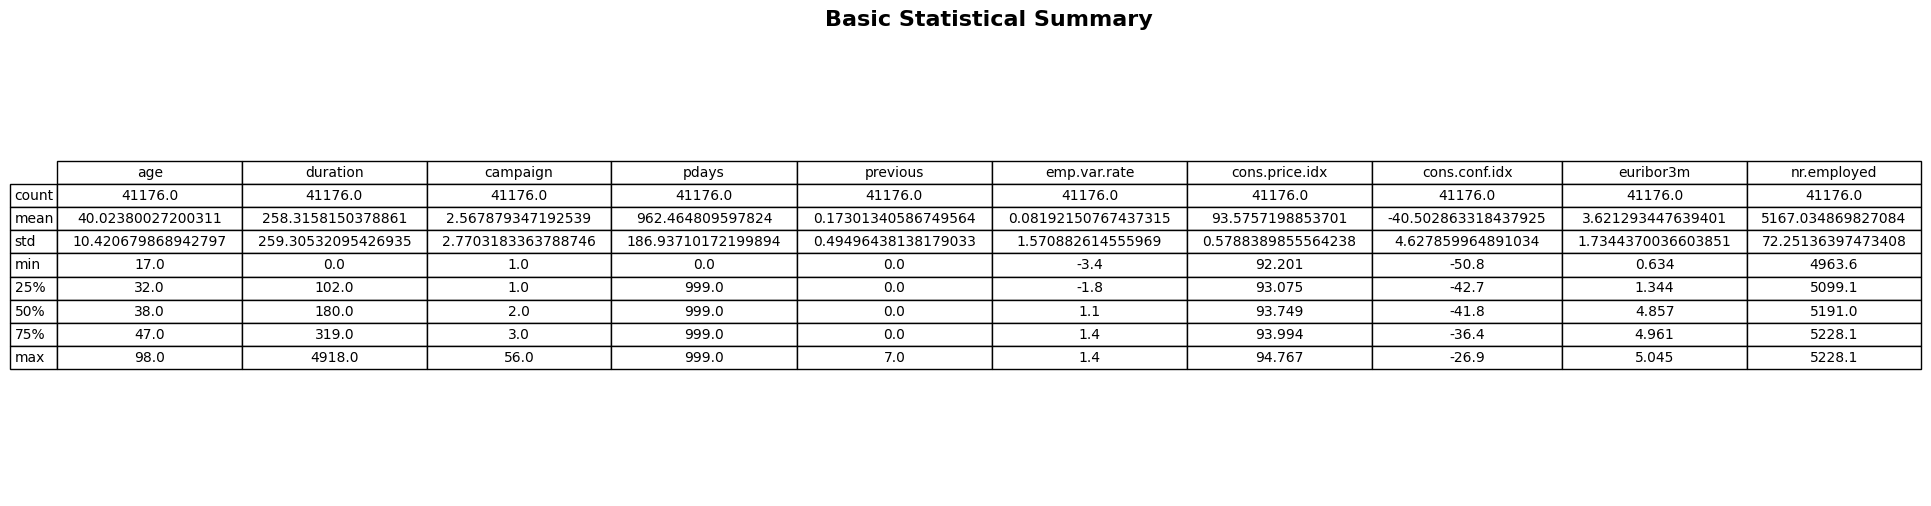

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("CleanedDataset.csv")

# Statistical summary
summary = data.describe()

# Table
plt.figure(figsize=(12, 6))
plt.axis('off')
plt.title("Basic Statistical Summary", fontsize=16, fontweight='bold')
table = plt.table(
    cellText=summary.values,
    colLabels=summary.columns,
    rowLabels=summary.index,
    cellLoc='center',
    loc='center',
    colLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.auto_set_column_width(col=list(range(len(summary.columns))))
for key, cell in table.get_celld().items():
    cell.set_height(0.05)
plt.show()

# **Data Visualisation**

## **Data distribution**

### **Categorical columns**

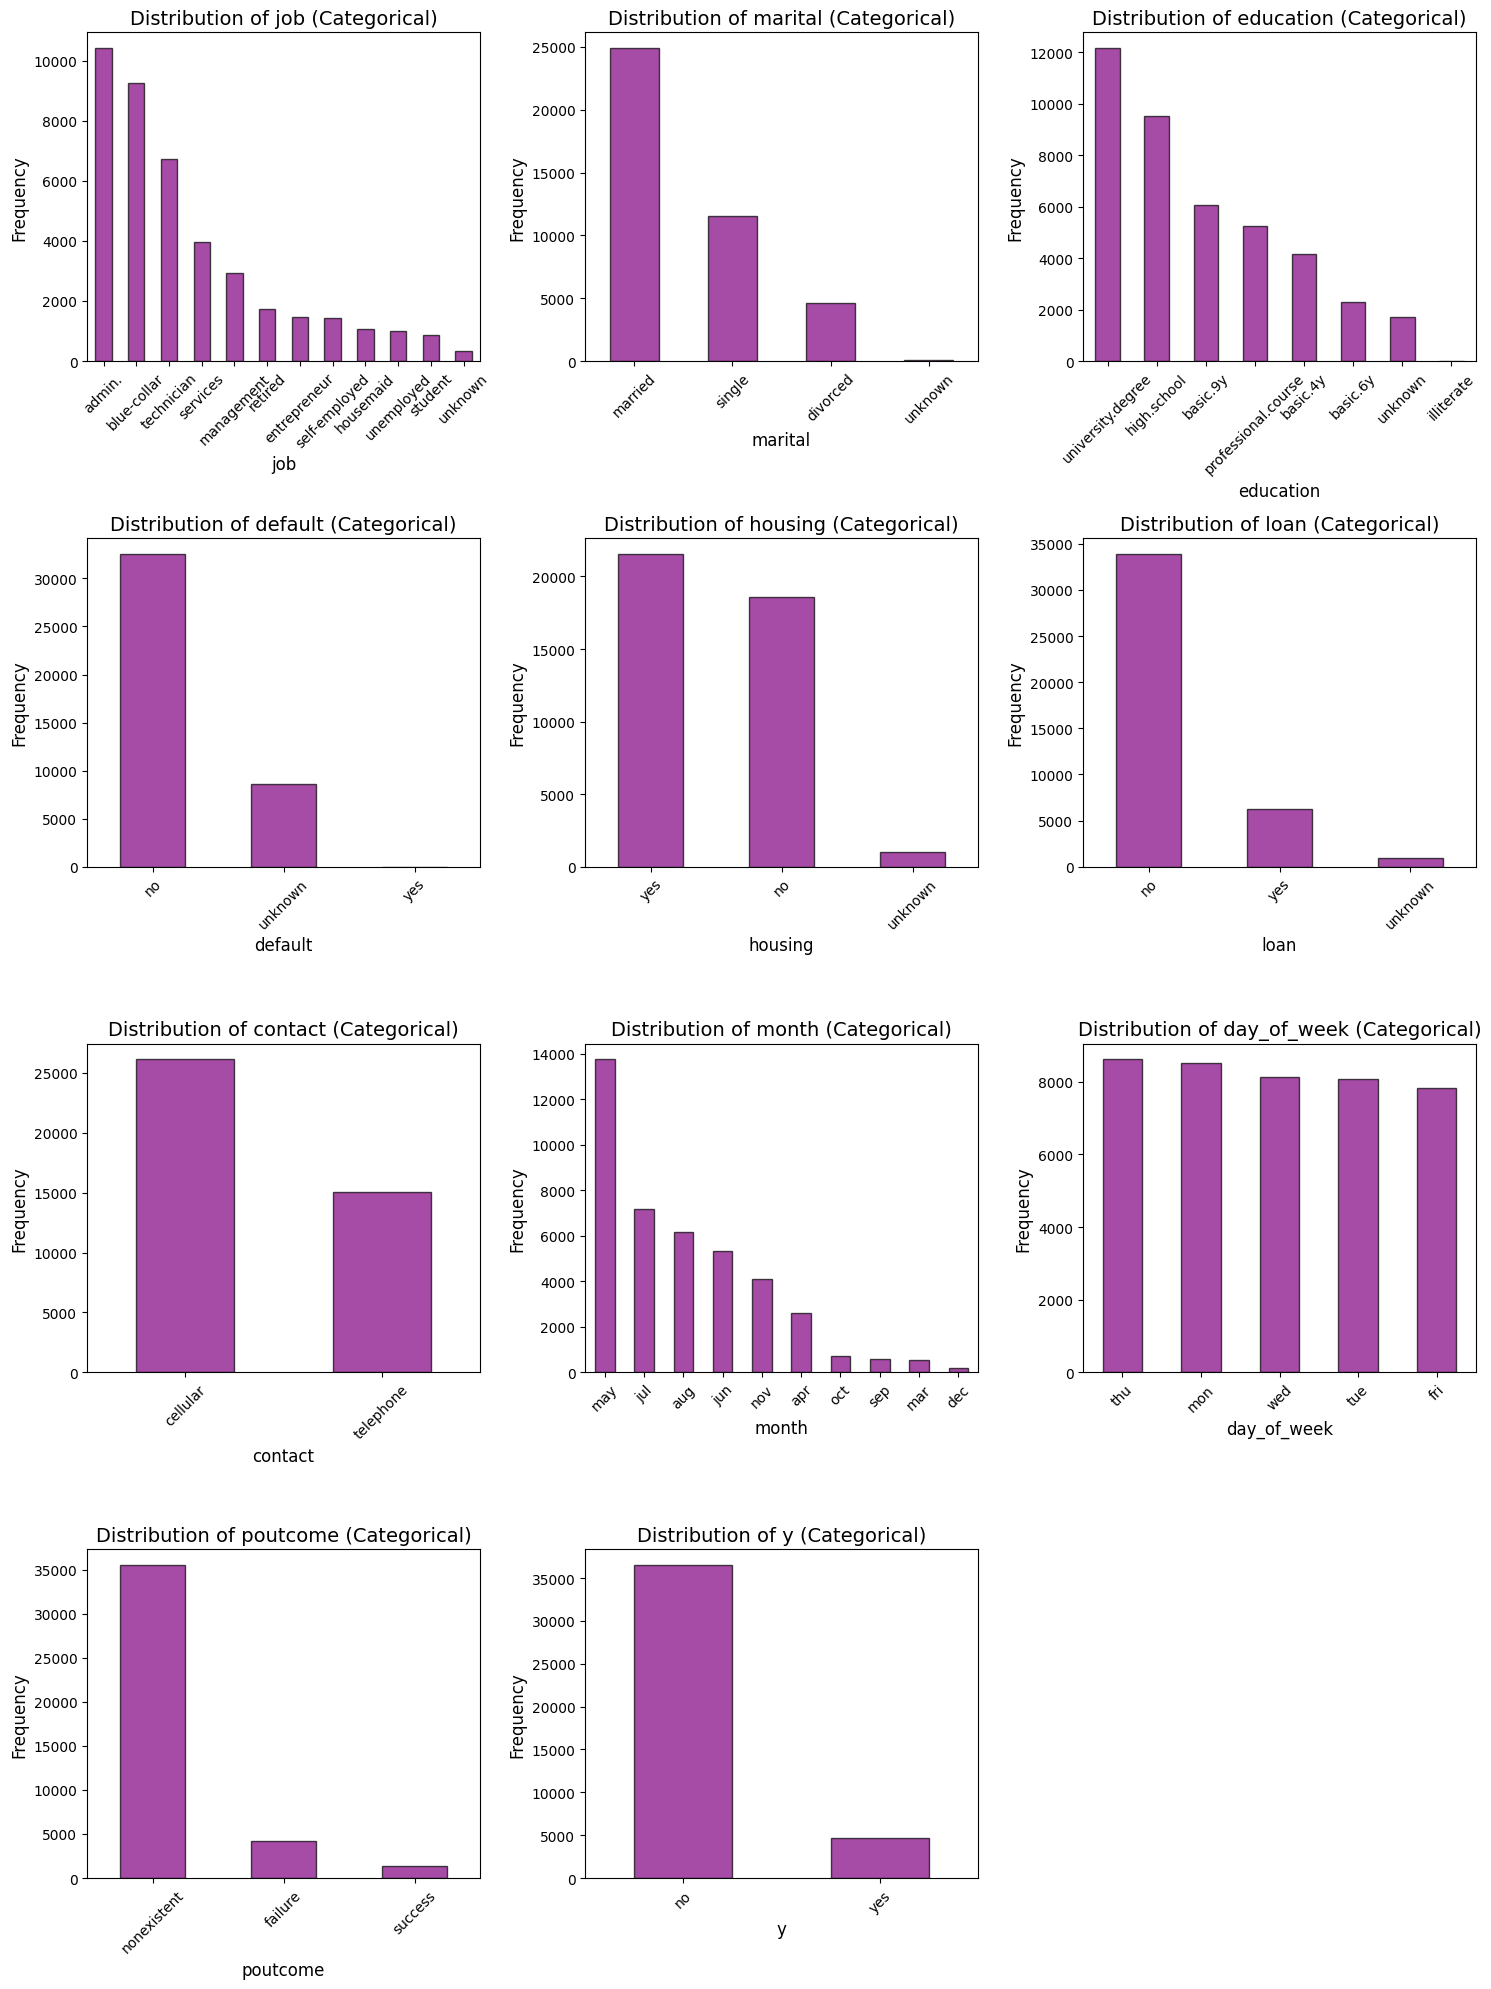

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('CleanedDataset.csv')

categorical_columns = df.select_dtypes(include=['object', 'category']).columns

num_columns = 3
num_rows = (len(categorical_columns) // num_columns) + (len(categorical_columns) % num_columns > 0)

# Subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))
axes = axes.flatten()

# Loop through each categorical column
for i, column in enumerate(categorical_columns):
    ax = axes[i]  # Select the appropriate subplot
    # Plot bar graph for categorical data
    df[column].value_counts().plot(kind='bar', color='purple', edgecolor='black', alpha=0.7, ax=ax)
    # Adding title and labels
    ax.set_title(f'Distribution of {column} (Categorical)', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

### **Numerical columns**

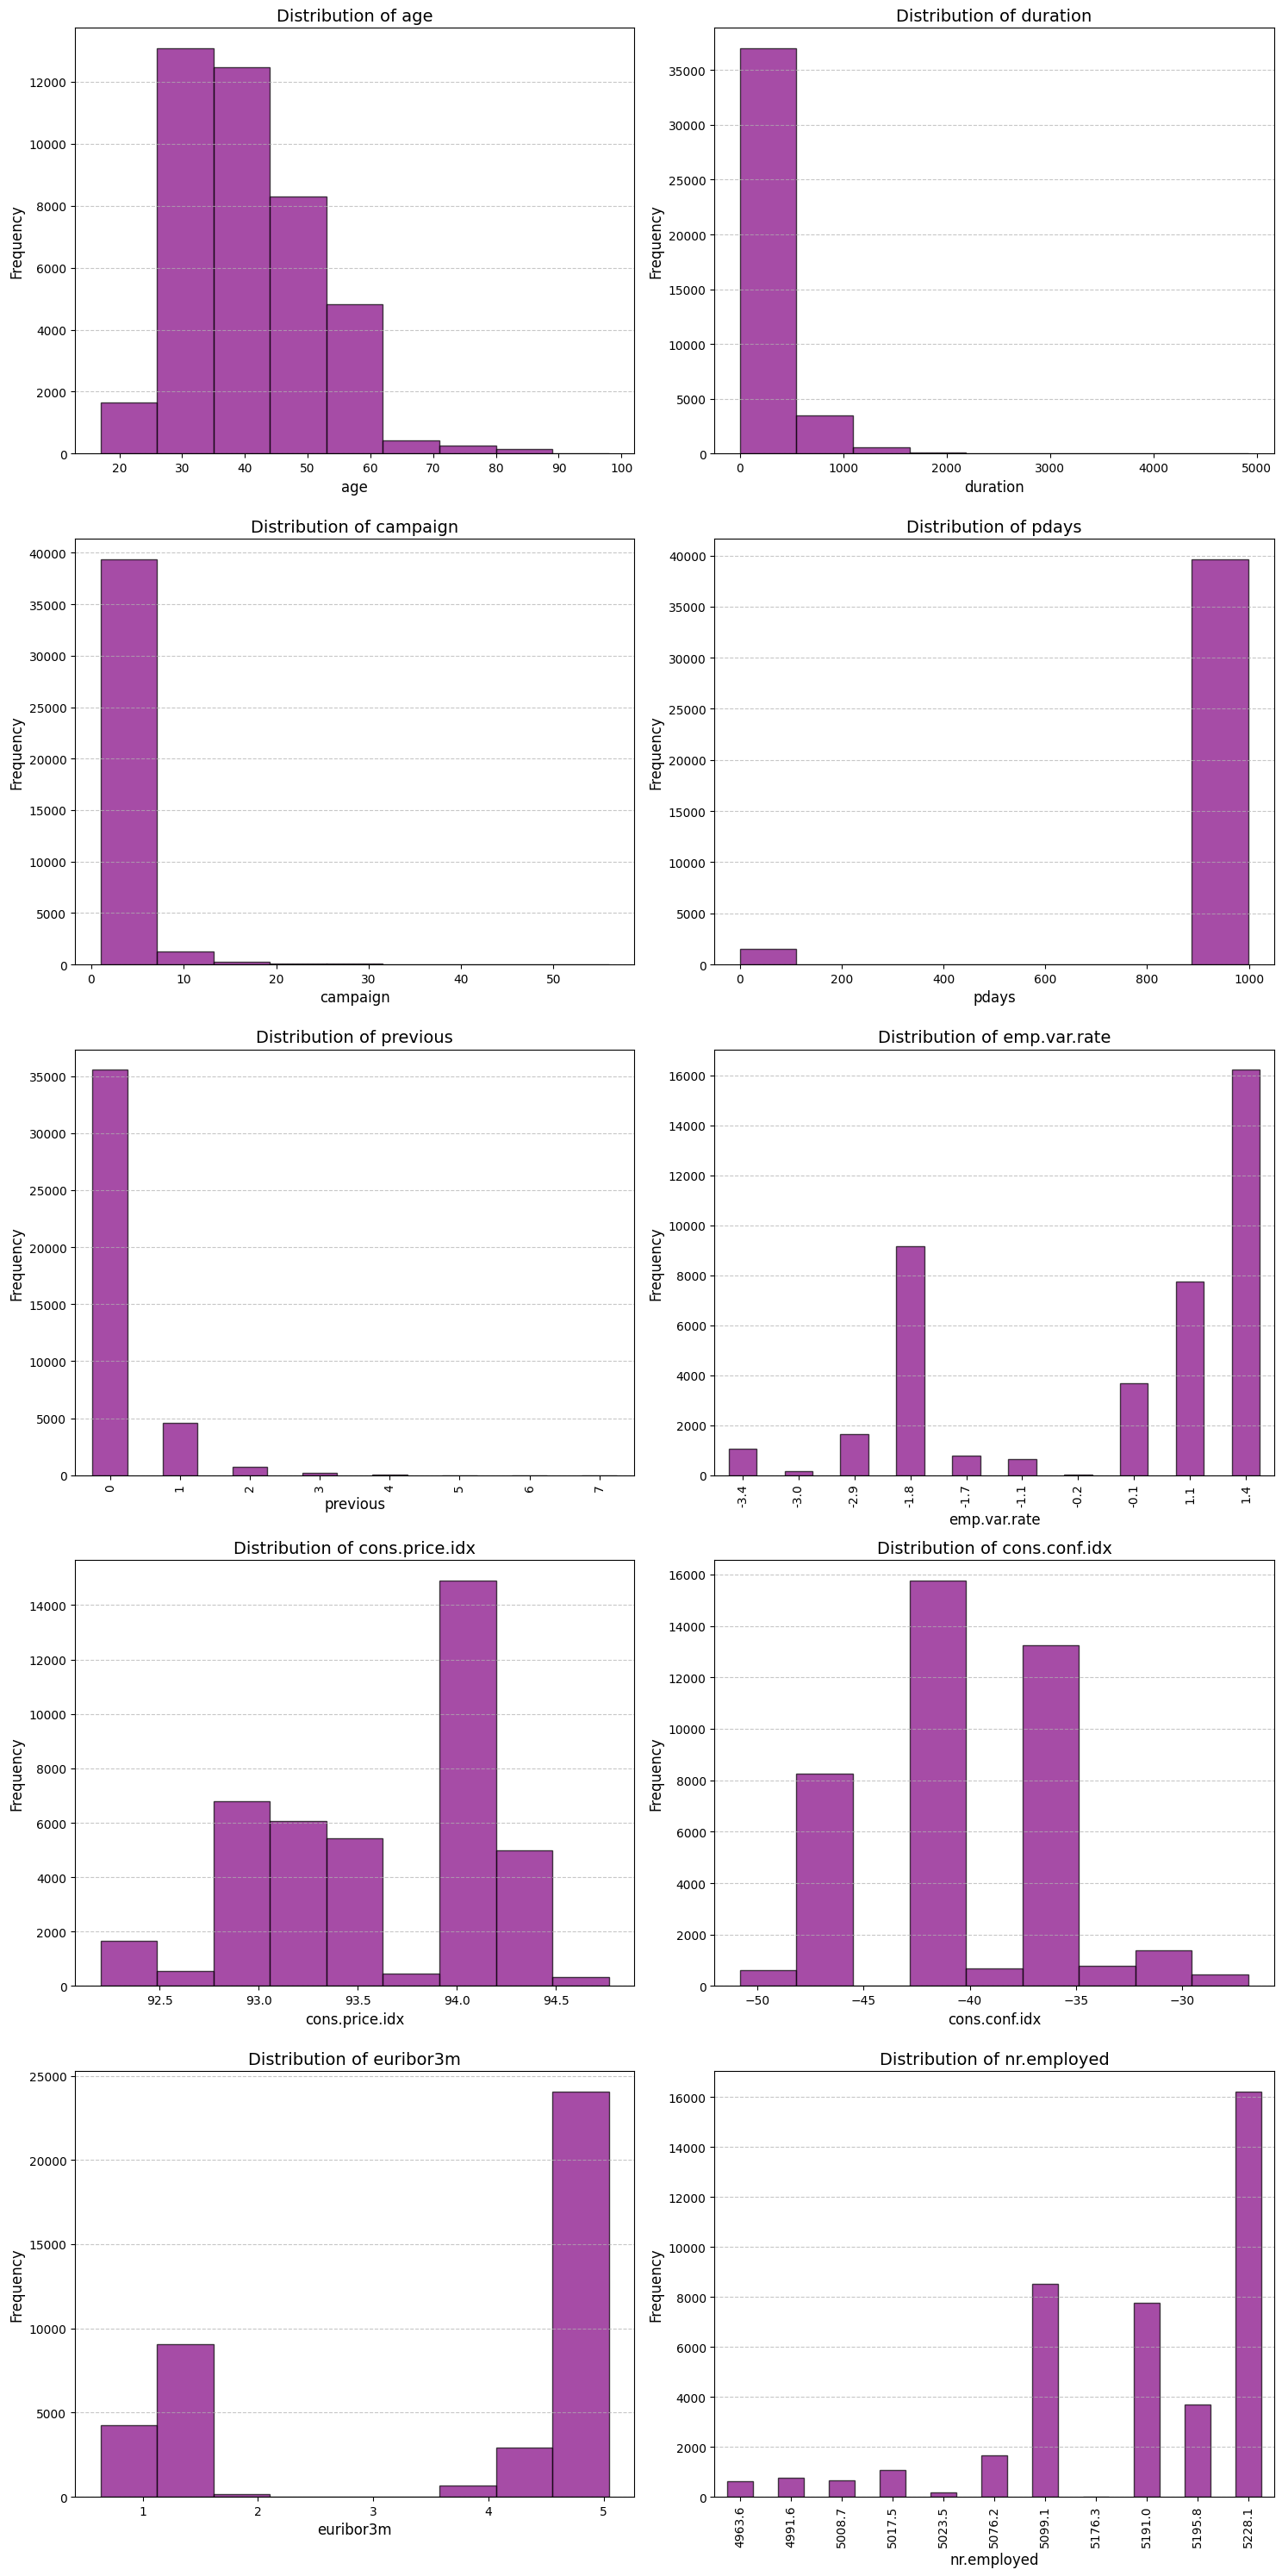

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset (update the file path as needed)
data = pd.read_csv('CleanedDataset.csv')

# Define numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Plot bar graphs for numerical columns with two graphs in one row
fig, axes = plt.subplots(nrows=(len(numerical_columns) + 1) // 2, ncols=2, figsize=(15, 30))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    ax = axes[i]
    if data[col].nunique() > 20:  # If there are too many unique values, use binning
        bins = np.linspace(data[col].min(), data[col].max(), 10)
        data[col].plot(kind='hist', bins=bins, color='purple', edgecolor='black', alpha=0.7, ax=ax)
        ax.set_title(f"Distribution of {col}", fontsize=14)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel("Frequency", fontsize=12)
    else:
        data[col].value_counts().sort_index().plot(kind='bar', color='purple', edgecolor='black', alpha=0.7, ax=ax)
        ax.set_title(f"Distribution of {col}", fontsize=14)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel("Frequency", fontsize=12)

    ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **Data distribution respect to y**

### **Categorical columns**

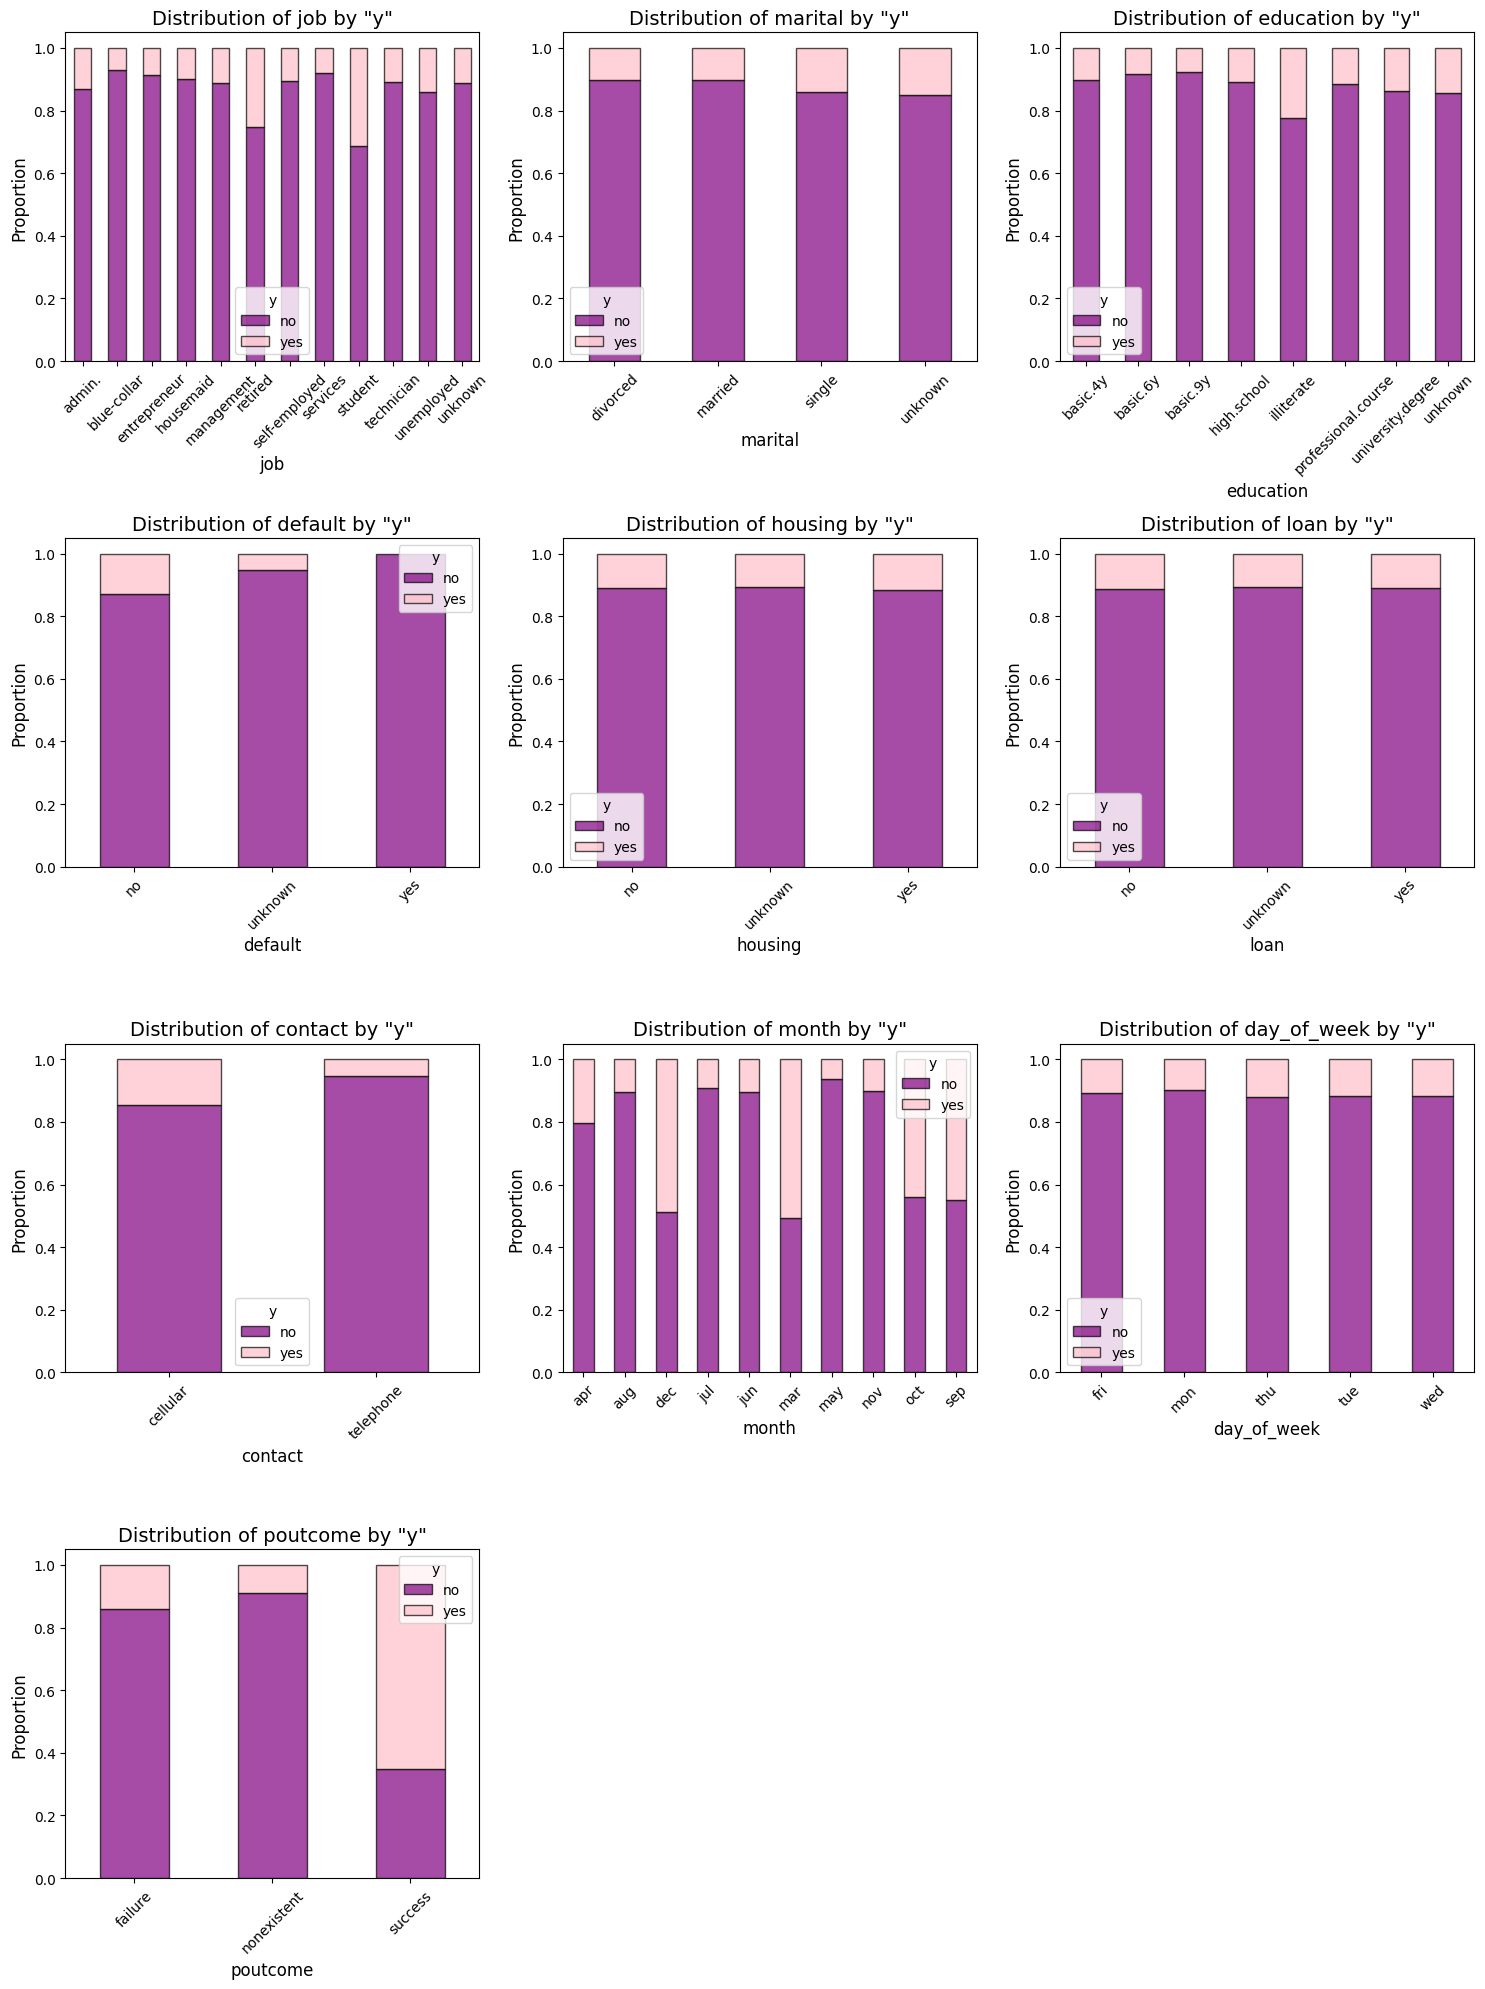

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('CleanedDataset.csv')

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Exclude the target column "y" from being plotted as a categorical variable
categorical_columns = categorical_columns.drop("y")

num_columns = 3
num_rows = (len(categorical_columns) // num_columns) + (len(categorical_columns) % num_columns > 0)

# Subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, num_rows * 5))
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    ax = axes[i]  # Select the appropriate subplot
    cross_tab = pd.crosstab(df[column], df["y"], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, color=['purple', 'pink'], edgecolor='black', alpha=0.7, ax=ax)
    ax.set_title(f'Distribution of {column} by "y"', fontsize=14)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Proportion', fontsize=12)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

### **Numeric columns**

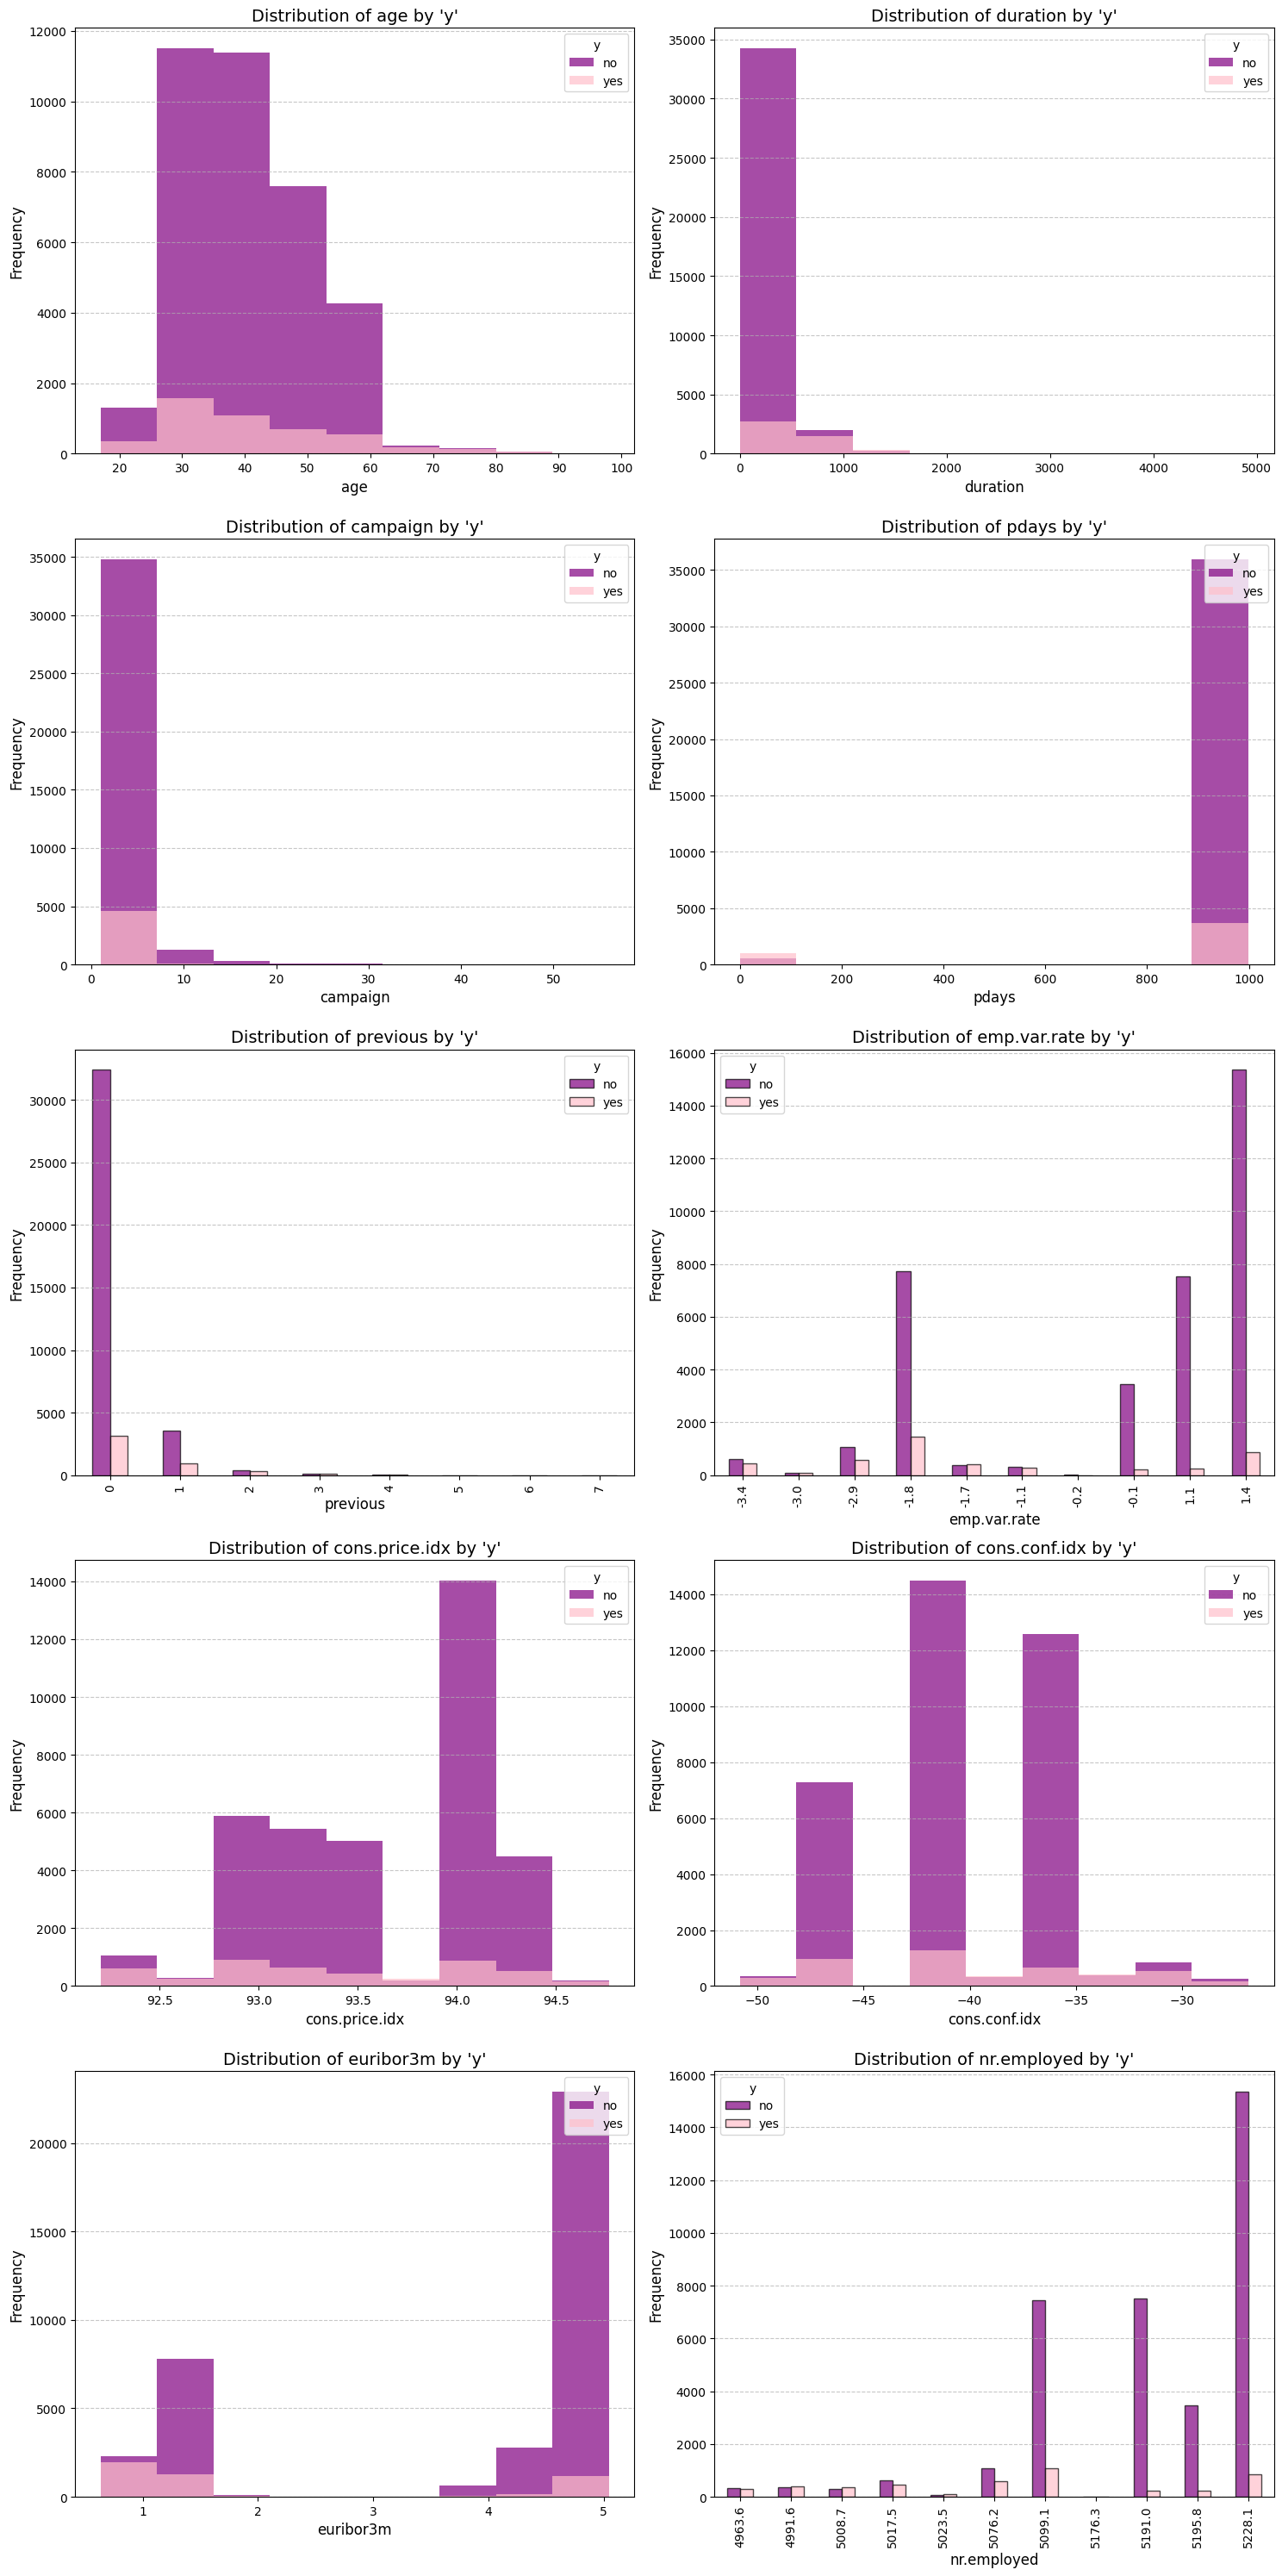

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
data = pd.read_csv('CleanedDataset.csv')

# Define numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Plot bar graphs for numerical columns with respect to "y"
fig, axes = plt.subplots(nrows=(len(numerical_columns) + 1) // 2, ncols=2, figsize=(15, 30))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    ax = axes[i]

    # Check if the column has many unique values (for binning)
    if data[col].nunique() > 20:
        bins = np.linspace(data[col].min(), data[col].max(), 10)
        colors = {'no': 'purple', 'yes': 'pink'}
        for label in data['y'].unique():
            subset = data[data['y'] == label]
            ax.hist(subset[col], bins=bins, color=colors.get(label, 'blue'), alpha=0.7, label=f'{label}')
        ax.set_title(f"Distribution of {col} by 'y'", fontsize=14)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel("Frequency", fontsize=12)
        ax.legend(title='y', loc='upper right')
    else:
        grouped = data.groupby([col, 'y']).size().unstack(fill_value=0)
        grouped.plot(kind='bar', stacked=False, ax=ax, color=['purple', 'pink'], edgecolor='black', alpha=0.7)
        ax.set_title(f"Distribution of {col} by 'y'", fontsize=14)
        ax.set_xlabel(col, fontsize=12)
        ax.set_ylabel("Frequency", fontsize=12)

    ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# **Check null values**

In [34]:
import pandas as pd

data = pd.read_csv('CleanedDataset.csv')

# Check for null values
nullValues = data.isnull().sum()
# Display null value count
print("Null values in each column:")
print(nullValues)

Null values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


# **Handle duplicates**

## **Check for duplicate values**

In [35]:
import pandas as pd

data = pd.read_csv("CleanedDataset.csv")

# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
num_duplicates = duplicate_rows.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")

if num_duplicates > 0:
    print("Duplicate rows found:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

Number of duplicate rows: 12
Duplicate rows found:
       age          job   marital            education  default housing loan  \
1266    39  blue-collar   married             basic.6y       no      no   no   
12261   36      retired   married              unknown       no      no   no   
14234   27   technician    single  professional.course       no      no   no   
16956   47   technician  divorced          high.school       no     yes   no   
18465   32   technician    single  professional.course       no     yes   no   
20216   55     services   married          high.school  unknown      no   no   
20534   41   technician   married  professional.course       no     yes   no   
25217   39       admin.   married    university.degree       no      no   no   
28477   24     services    single          high.school       no     yes   no   
32516   35       admin.   married    university.degree       no     yes   no   
36951   45       admin.   married    university.degree       no      

## **Remove duplicate rows**

In [38]:
# Remove duplicate rows
data = data.drop_duplicates()
print("Duplicate rows removed.")

# Save the updated dataset to a new file
data.to_csv("CleanedDataset.csv", index=False)
print("Updated dataset saved to CleanedDataset.csv.")

Duplicate rows removed.
Updated dataset saved to CleanedDataset.csv.


# **Check intercorrelations**

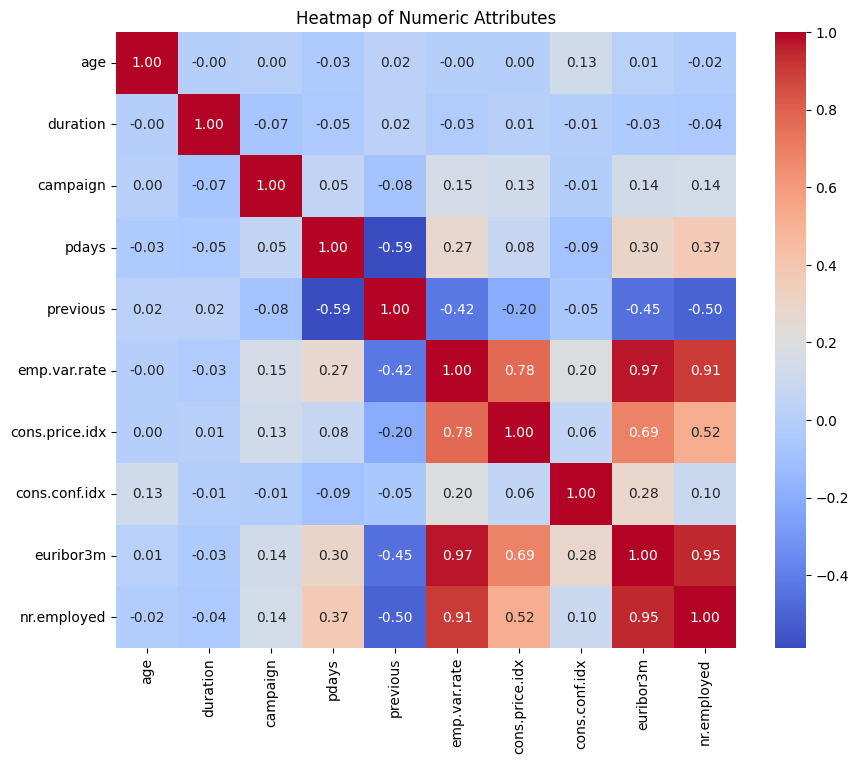

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('CleanedDataset.csv')

# Select numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64'])

# Correlation matrix
correlation_matrix = numeric_columns.corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Heatmap of Numeric Attributes")
plt.show()

# **Feature importance**

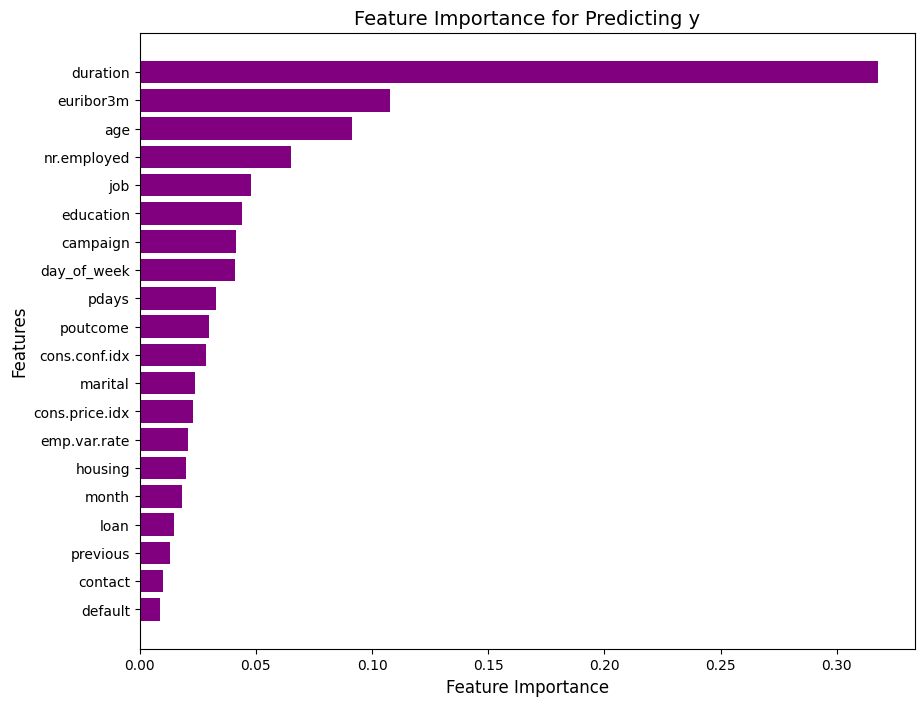

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

file_path = 'CleanedDataset.csv'
data = pd.read_csv(file_path)

# Do a label encoding to train a random forest
label_encoders = {}
data_encoded = data.copy()
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le

X = data_encoded.drop(columns=['y'])
y = data_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model to get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
# Get feature importances
importances = rf.feature_importances_
features = X.columns
# Sort features
indices = np.argsort(importances)[::-1]
features_sorted = features[indices]
importances_sorted = importances[indices]

# Display
plt.figure(figsize=(10, 8))
plt.barh(features_sorted, importances_sorted, color='purple')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance for Predicting y', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

# **Drop unnecessary columns**

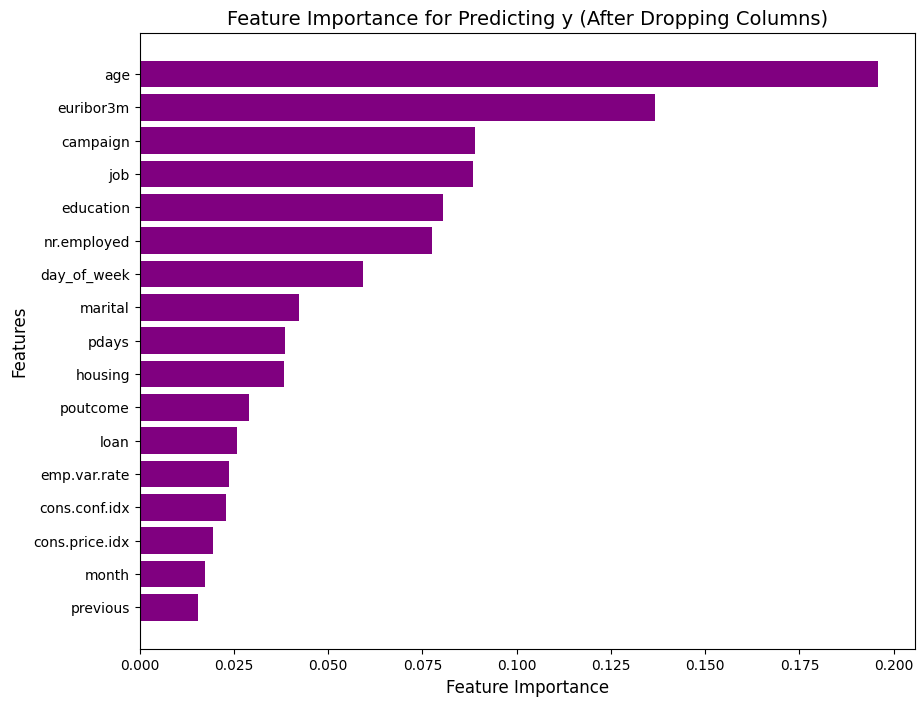

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

file_path = 'CleanedDataset.csv'
data = pd.read_csv(file_path)

# Drop unnecessary columns
data = data.drop(columns=['duration', 'contact', 'default'])

# Save the updated dataset to a new CSV file
data.to_csv('DatasetDropped.csv', index=False)

# Do a label encoding for train a random forest
label_encoders = {}
data_encoded = data.copy()
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data[col])
    label_encoders[col] = le

X = data_encoded.drop(columns=['y'])
y = data_encoded['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple model for get feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
# Get feature importances
importances = rf.feature_importances_
features = X.columns
# Sort by importance
indices = np.argsort(importances)[::-1]
features_sorted = features[indices]
importances_sorted = importances[indices]

# Display
plt.figure(figsize=(10, 8))
plt.barh(features_sorted, importances_sorted, color='purple')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance for Predicting y (After Dropping Columns)', fontsize=14)
plt.gca().invert_yaxis()
plt.show()

# **Handle Outliers**

## **Check outliers**

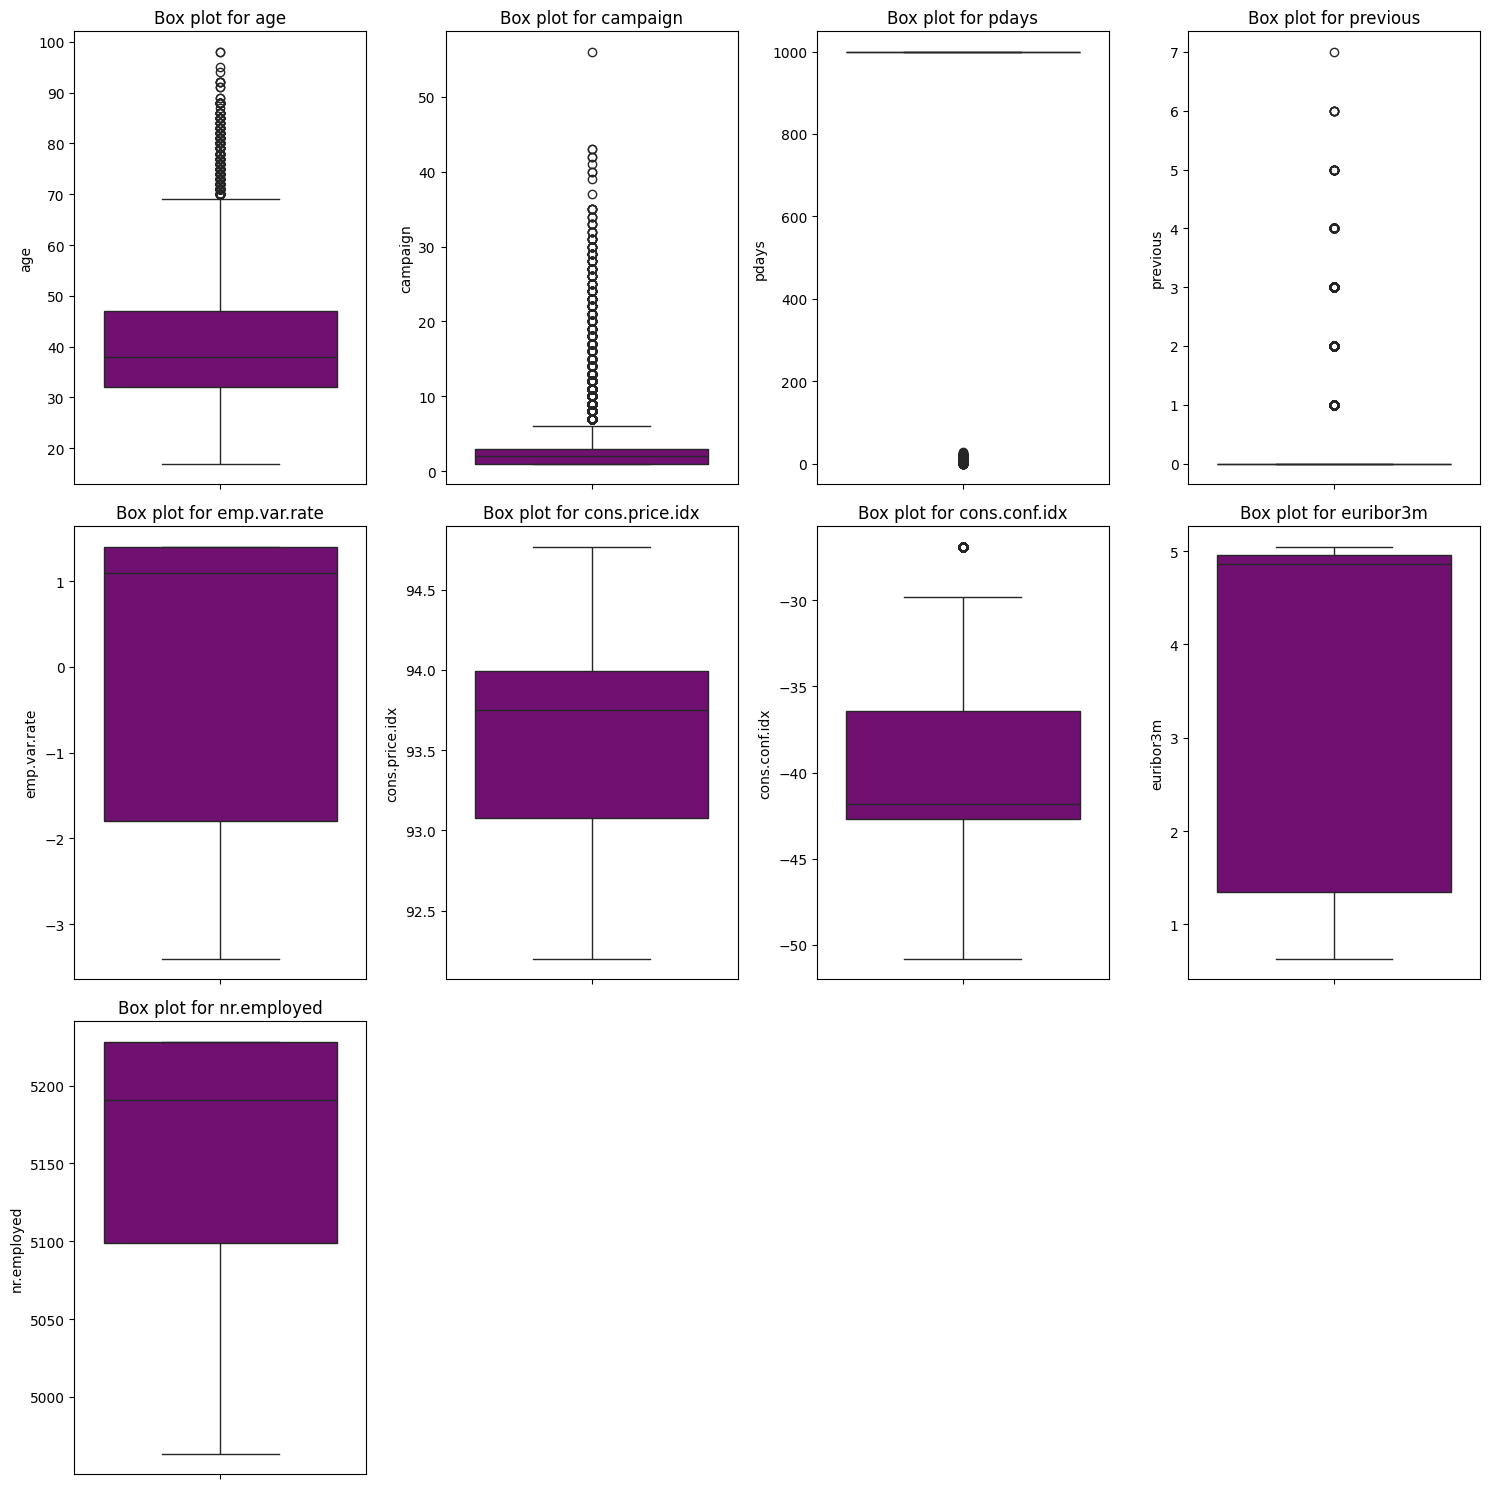

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('DatasetDropped.csv')

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of rows needed to fit all subplots
num_columns = 4
num_rows = (len(numerical_columns) // num_columns) + (len(numerical_columns) % num_columns > 0)

# Set up the plot
plt.figure(figsize=(15, num_rows * 5))

# Create a box plot for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_columns, i)  # Arrange plots in a grid with 4 columns
    sns.boxplot(data=data[column], color='purple')
    plt.title(f"Box plot for {column}")
    plt.tight_layout()

# Show the plot
plt.show()

## **Handle outliers with capping**

In [46]:
import pandas as pd

# List of column names to apply capping
cols_cap = ['age', 'campaign', 'cons.conf.idx']

# Apply capping to the specified columns
for col in cols_cap:
    lower_cap = data[col].quantile(0.05)  # 5th percentile
    upper_cap = data[col].quantile(0.95)  # 95th percentile
    # capping
    data[col] = data[col].clip(lower=lower_cap, upper=upper_cap)

data.to_csv("Capped.csv", index=False)
print("Capping applied successfully. The modified dataset has been saved to: Capped.csv")

Capping applied successfully. The modified dataset has been saved to: Capped.csv


## **Visualize capped columns**

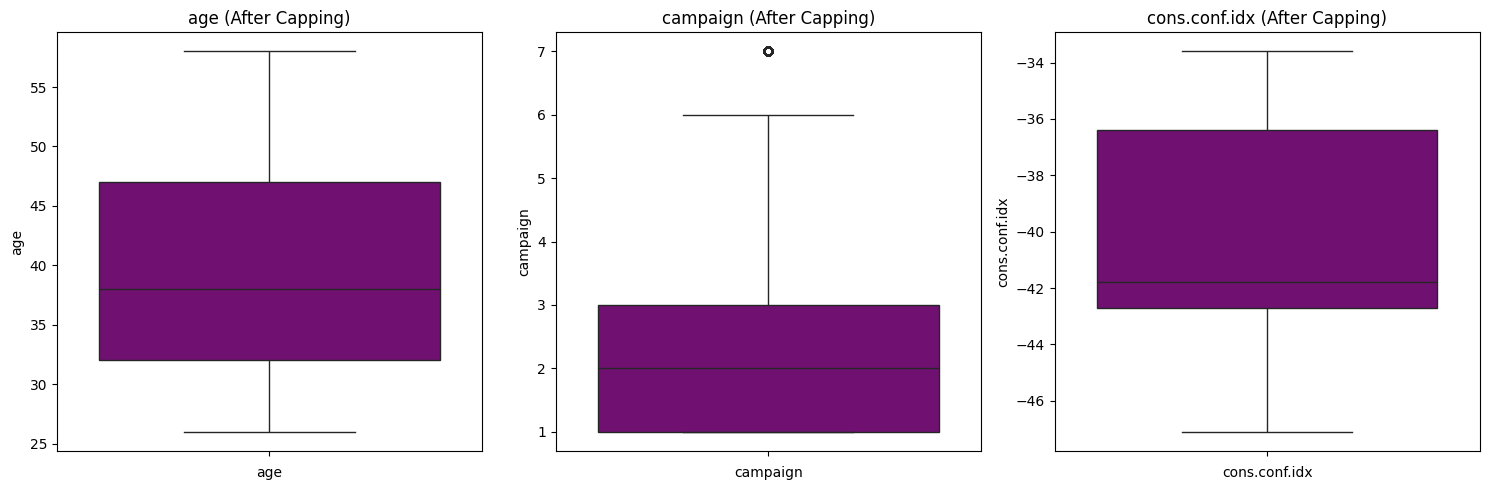

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Capped.csv')

# Columns to visualize
cols_plot = ['age', 'campaign', 'cons.conf.idx']

# Create boxplots to visualize
plt.figure(figsize=(15, 5))
for i, column in enumerate(cols_plot):
    plt.subplot(1, len(cols_plot), i + 1)
    sns.boxplot(data=df[column], color='purple')
    plt.title(f'{column} (After Capping)')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

# **Encodeing**

In [48]:
import pandas as pd

data = pd.read_csv('Capped.csv')

# Identify categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
# One-hot encoding
encoded_data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
# Replace boolean values with 1 / 0
encoded_data[encoded_data.columns[encoded_data.dtypes == 'bool']] = encoded_data[encoded_data.columns[encoded_data.dtypes == 'bool']].astype(int)

# Make pdays column as a binary column
encoded_data['prev_cont'] = encoded_data['pdays'].replace(999, 1).apply(lambda x: 0 if x != 1 else x)
encoded_data = encoded_data.drop(columns=['pdays'])

# Rename the 'y_yes' column to 'y'
encoded_data = encoded_data.rename(columns={'y_yes': 'y'})
# Move the 'y' column to the end
cols = [col for col in encoded_data if col != 'y'] + ['y']
encoded_data = encoded_data[cols]

encoded_data.head()
encoded_data.to_csv('Encoded.csv', index=False)

# **Handle class inbalance**

## **Display class inbalence**

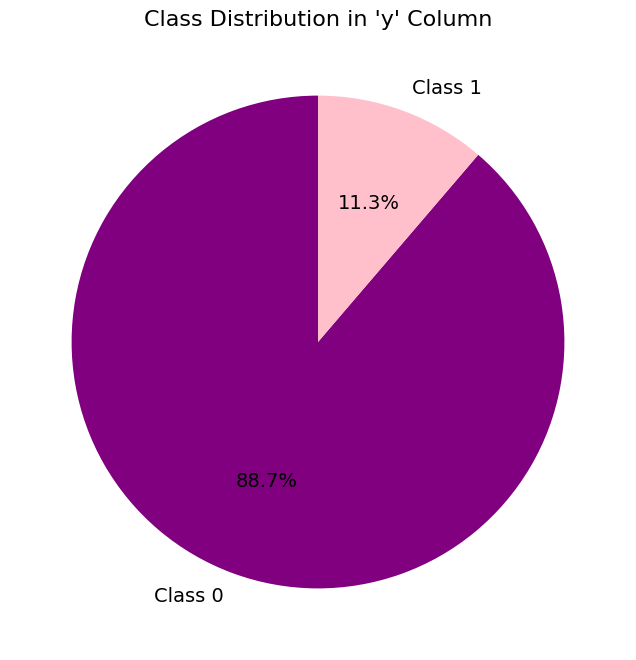

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Encoded.csv")

# Counts
counts = data["y"].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
counts.plot.pie(
    labels=["Class 0", "Class 1"],
    autopct="%1.1f%%",
    startangle=90,
    colors=["purple", "pink"],
    textprops={"fontsize": 14}
)
plt.title("Class Distribution in 'y' Column", fontsize=16)
plt.ylabel("")
plt.show()

# **Shuffle the dataset**

In [50]:
import pandas as pd

data = pd.read_csv("Balanced.csv")
shuffled = data.sample(frac=1).reset_index(drop=True)

shuffled.to_csv("DatasetRF.csv", index=False)
print("Dataset shuffled successfully.")

Dataset shuffled successfully.


# **Feature scaling**

In [51]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd

data = pd.read_csv("DatasetRF.csv")

# Continuous numerical features
numerical_features = ['age', 'campaign', 'previous', 'emp.var.rate',
                      'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Create a copy of the dataset to scale
scaled_data = data.copy()
# Apply StandardScaler
scaler = StandardScaler()
scaled_data[numerical_features] = scaler.fit_transform(data[numerical_features])

print(scaled_data.head())
scaled_data.to_csv('DatasetNN.csv', index=False)

        age  duration  campaign  previous  emp.var.rate  cons.price.idx  \
0 -1.273173       472 -0.025260  3.174506     -0.351335        1.984167   
1  1.149909       841 -0.025260  3.174506     -0.351335        1.149745   
2  0.746062       185 -0.025260 -0.400461      1.098865       -0.055319   
3 -1.172211        68 -0.025260  1.387023     -0.757391       -0.934777   
4  1.553756       421 -0.694487 -0.400461      0.228745       -0.444771   

   cons.conf.idx  euribor3m  nr.employed  job_blue-collar  ...  month_oct  \
0      -1.492781  -1.027848    -1.975743                0  ...          0   
1       0.661926  -1.103227    -1.975743                0  ...          0   
2       0.976154   1.056272     1.063205                0  ...          0   
3      -1.290777  -0.882621    -0.418928                1  ...          0   
4      -0.348093   0.618865     0.692097                0  ...          0   

   month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0          0       